<a href="https://colab.research.google.com/github/rohithub55/airbnb-analysis/blob/main/airbnb_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIRBNB ANALYSIS

#  Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.


# This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

In [2]:
#Let's fuel up the rocket to launch...
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.express as px

# Mount the google drive.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Let's load the fuel (Dataset)

In [4]:
#creating directory path
dir_path='/content/drive/My Drive/Dataset'

In [5]:
#read dataset and naming it as airbnb data frame
airbnb_df=pd.read_csv("/content/drive/MyDrive/Airbnb/Copy of Airbnb NYC 2019.csv")

#Let's study the dataset we have...


In [6]:
# Let's check all the columns we have...
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
# Check the head
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
#Let's find out the all null values in dataset
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# It's time to deal with all missing values

In [9]:
# Let's operate on missing values
airbnb_df['name'].fillna('unknown',inplace=True)
airbnb_df['host_name'].fillna('no_name',inplace=True)
airbnb_df.reviews_per_month.fillna(0, inplace=True)

#Let's check weather the operation is successful or not...

In [10]:
airbnb_df[['host_name','name','reviews_per_month']].isnull().values.any()
# Congratulations the operation is successful...

False

# Now it's time to drop the unwanted columns..

In [11]:
airbnb_df= airbnb_df.drop(['last_review'],axis=1)

In [12]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

#we have dropped the last_review column...

In [13]:
#avg price for different type of room type
avg_price=airbnb_df.groupby('room_type')['price'].median().reset_index()
#Looks like there is no $ symbol for price so, let's apply $ sign to price
avg_price['price']=avg_price['price'].apply(lambda x:"{0:1.0f}$".format(x))
avg_price

,room_type,price
0,Entire home/apt,160$
1,Private room,70$
2,Shared room,45$


#Successfully we have applied $ sign for all Prices.


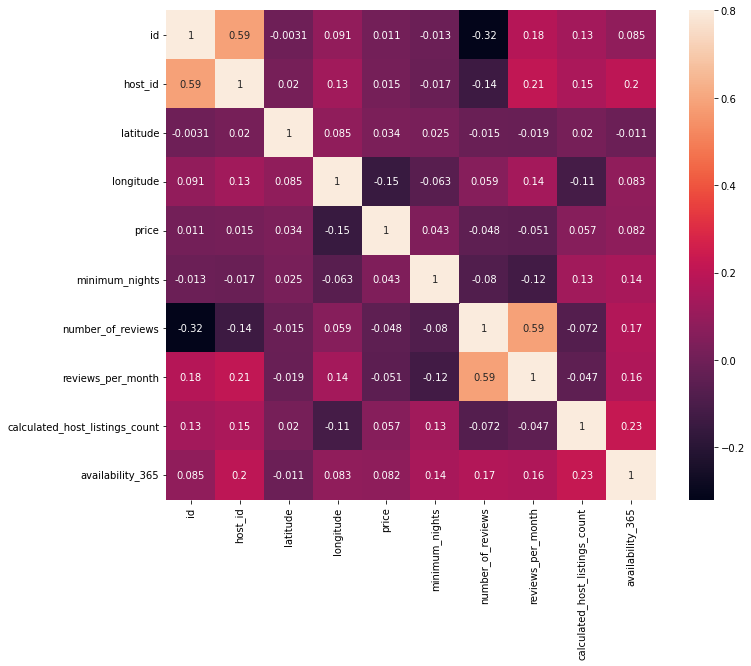

In [14]:
#correlation matrix
corrmat = airbnb_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

#As we see above Histogram there is no perfect corelation is given but then also we can get an overview.

In [15]:
#finding which room type have highest price
px.bar(data_frame=avg_price,x='room_type',y='price',color='room_type',title='Avg price for each type of room(Room type vs Price)')

# By looking at above bar graph we get a clear idea of average prices for different room types.